# Time Series to predict Future Customer Referrals 

Current use case : forecasting future referrals


Historic data: For every month you have X number of rferrals -  2019 to 2021 march


 ## Import Libraries

In [82]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Import Data 

In [83]:
referrals = pd.read_csv(r"/Users/_sandeepbansal/Desktop/referrals.csv",index_col=['Month'],parse_dates=['Month'])

In [84]:
referrals.tail(10)

,Referral_Count
Month,
19-Nov,3
19-Dec,3
20-Jan,3
20-Feb,5
20-Mar,11
20-Apr,1
20-May,5
20-Jun,15
20-Jul,8


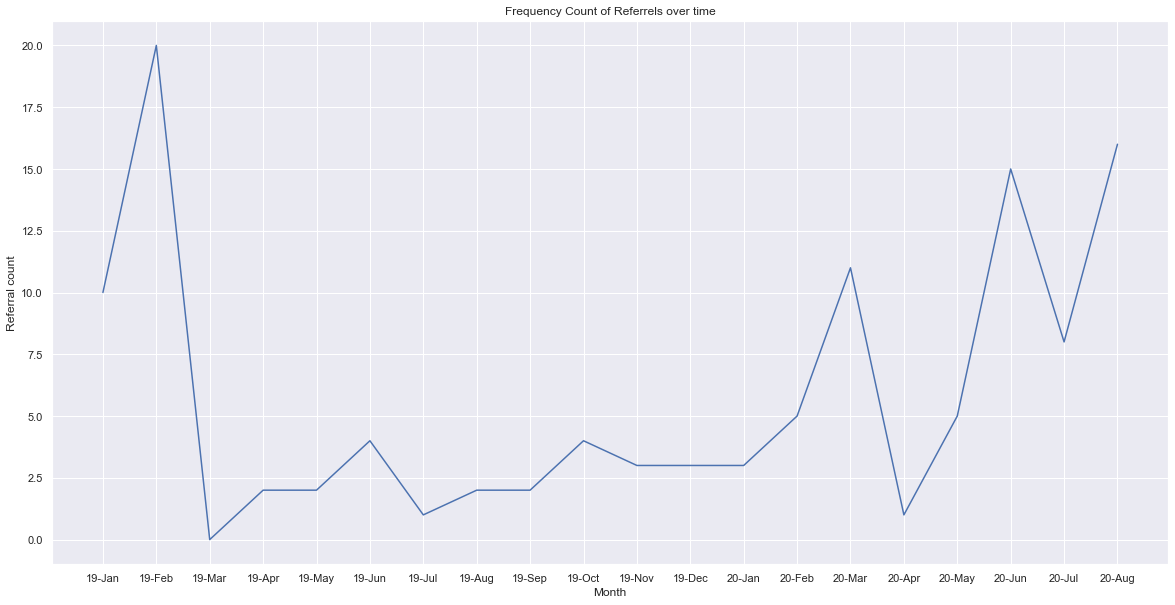

In [85]:
plt.figure(figsize=(20,10))
plt.plot(referrals['Referral_Count'])
plt.title("Frequency Count of Referrels over time")
plt.xlabel("Month")
plt.ylabel("Referral count")
plt.show()


In [86]:
'''

Increasing Trend is observed

Observe seasonality


1st technique of time series forecasting is "Moving Average"

Next forecasted future values is the average of past set of values

'''

'\n\nIncreasing Trend is observed\n\nObserve seasonality\n\n\n1st technique of time series forecasting is "Moving Average"\n\nNext forecasted future values is the average of past set of values\n\n'

In [87]:
def movingaverage_forecast(series,window,plot_intervals=False,scale=1.96):
    
    rolling_avg = series.rolling(window=window).mean()
    
    plt.figure(figsize=(20,10))
    
    plt.title("plotting the moving average plot")
    
    plt.plot(rolling_avg,label='rolling averge  predicted values')
    
    if plot_intervals:
        mae = mean_absolute_percentage_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
        
    plt.plot(series[window:],label='áctual values')  
    plt.legend(loc='best')
    

    

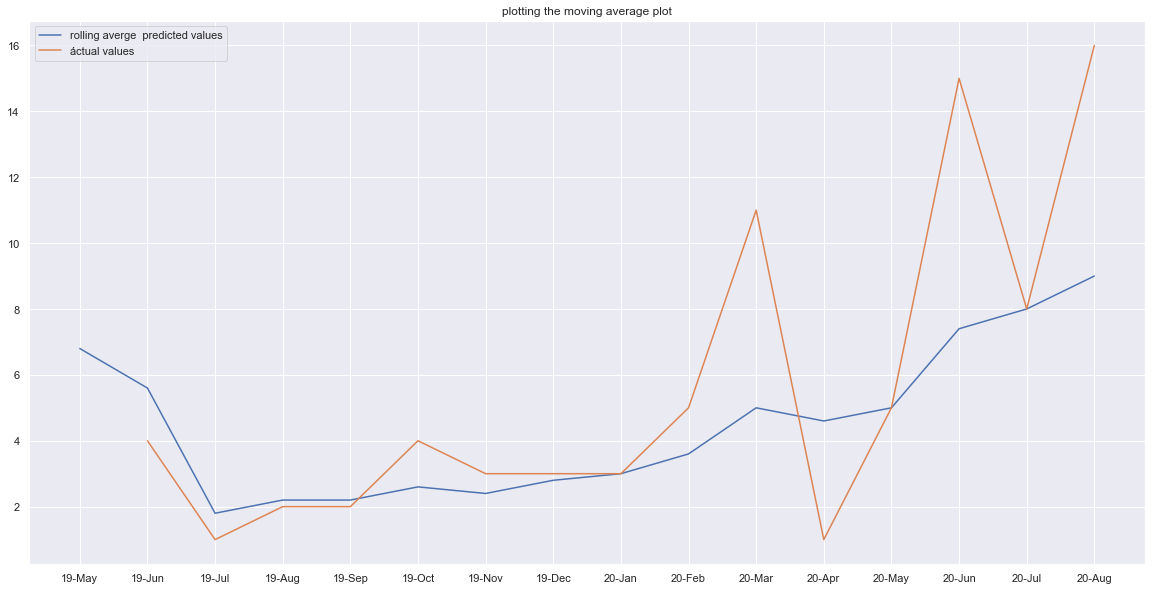

In [88]:
movingaverage_forecast(referrals.Referral_Count,window=5)

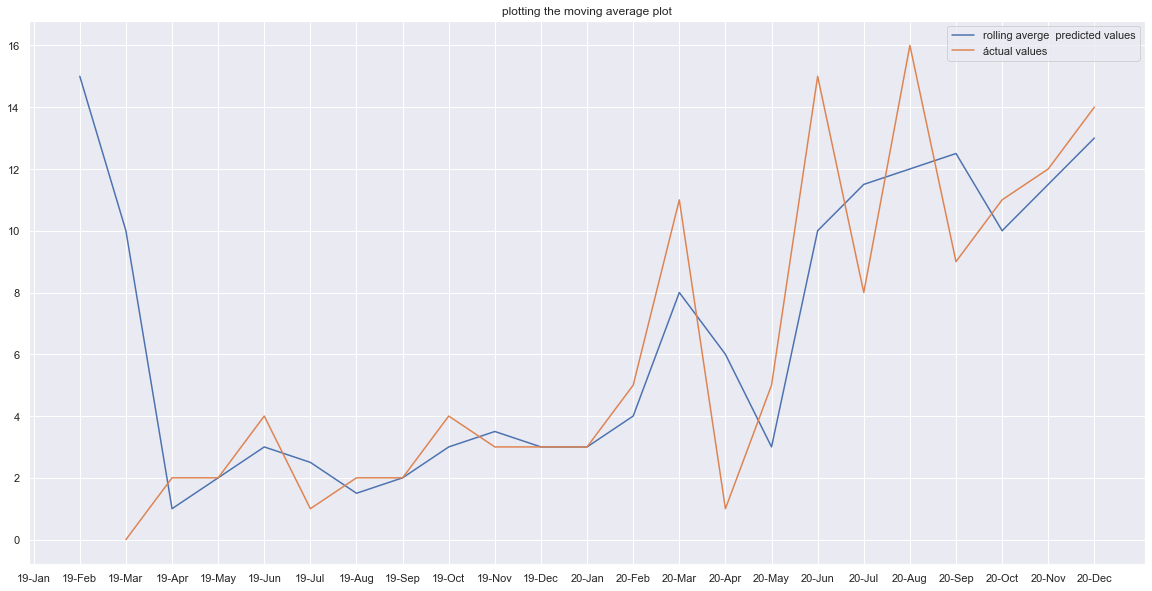

In [43]:
movingaverage_forecast(referrals.Referral_Count,window=2)

In [ ]:
#ARIMA - Auto regression integrated moving average

In [89]:
import statsmodels

In [90]:
from statsmodels.tsa.arima.model import ARIMA

In [98]:
model = ARIMA(referrals.Referral_Count,order=(3,3,2))

In [99]:
model_fit = model.fit()

In [100]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Referral_Count   No. Observations:                   20
Model:                 ARIMA(3, 3, 2)   Log Likelihood                 -56.944
Date:                Tue, 06 Apr 2021   AIC                            125.889
Time:                        10:56:40   BIC                            130.888
Sample:                             0   HQIC                           126.386
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0317      0.387     -2.665      0.008      -1.790      -0.273
ar.L2         -0.8587      0.449     -1.911      0.056      -1.740       0.022
ar.L3         -0.3619      0.479     -0.756      0.450      -1.300       0.576
ma.L1         -1.6434    123.431     -0.013      0.989    -243.564     240.277
ma.L2          0.9993    150.133      0.007      0.995    -293.257     295.255
sigma2        25.1469   3763.804      0.007      0.995   -7351.773    7402.067
===================================================================================
Ljung-Box (Q):                       16.01   Jarque-Bera (JB):                 1.54
Prob(Q):                              0.45   Prob(JB):                         0.46
Heteroskedasticity (H):               0.67   Skew:                             0.70
Prob(H) (two-sided):                  0.64   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
residuals = pd.DataFrame(model_fit.resid)

In [102]:
ypre = model_fit.forecast(4)

In [103]:
ypre

20    19.804515
21    24.370659
22    29.486621
23    38.061289
dtype: float64

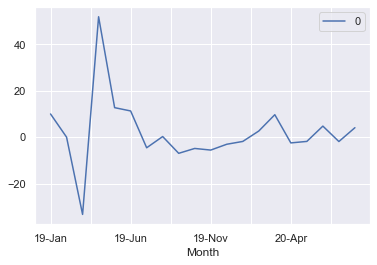

In [97]:
residuals.plot()

In [2]:
import quandl

# Replace with your own Quandl API key
QUANDL_API_KEY = 'BCzkk3NDWt7H9yjzx-DY' 
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN')


In [3]:
df.head()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2015-11-20,18.18,18.43,18.000,18.35,38392898.0,7.003281e+08
2015-11-23,18.45,18.70,18.215,18.61,3352514.0,6.186446e+07
2015-11-24,18.70,18.80,18.370,18.80,4871901.0,8.994087e+07
2015-11-25,18.85,19.50,18.770,19.45,4802607.0,9.153862e+07
2015-11-26,19.48,19.67,19.410,19.43,1648481.0,3.220713e+07


<Figure size 1440x720 with 0 Axes>

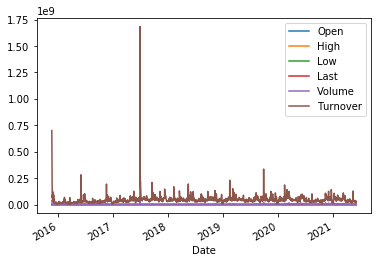

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))


df.plot();

In [10]:
prices = df['Last']
volumes = df['Volume']

In [12]:
prices.head()

Date
2015-11-20    18.35
2015-11-23    18.61
2015-11-24    18.80
2015-11-25    19.45
2015-11-26    19.43
Name: Last, dtype: float64

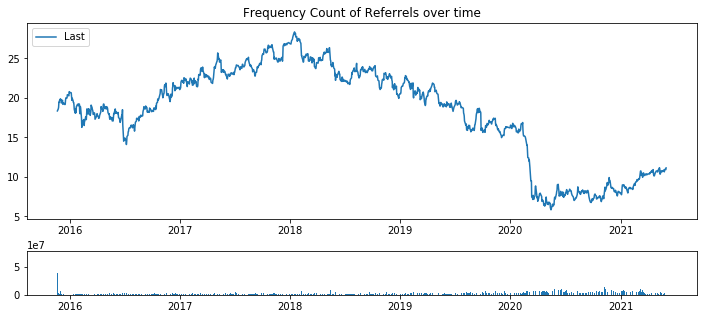

In [19]:
top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
top.plot(prices.index, prices, label='Last')
plt.title('Frequency Count of Referrels over time')
plt.legend(loc=2)


bottom = plt.subplot2grid((4, 4), (3,0), rowspan=1, colspan=4)
bottom.bar(volumes.index, volumes)

plt.gcf().set_size_inches(12, 5)
plt.subplots_adjust(hspace=0.75)

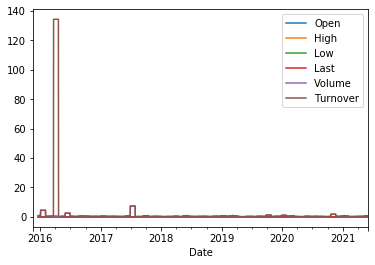

In [14]:
df_filled = df.asfreq('D', method='ffill')
df_returns = df_filled.pct_change()
df_std = df_returns.rolling(window=30, min_periods=30).std()
df_std.plot();

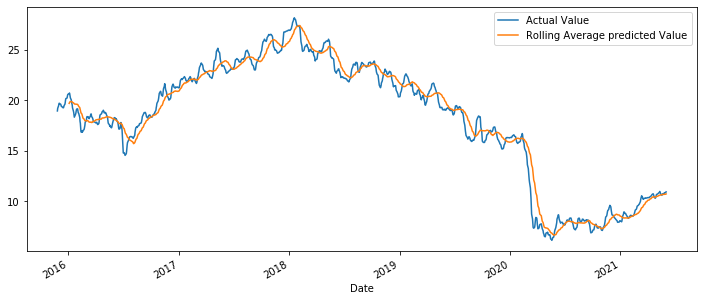

In [32]:
import quandl
import pandas as pd

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN.4')

df_filled = df.asfreq('D', method='ffill')
df_last = df['Last']

series_short = df_last.rolling(window=5, min_periods=5).mean()
series_long = df_last.rolling(window=30, min_periods=30).mean()

df_sma = pd.DataFrame(columns=['Actual Value', 'Rolling Average predicted Value'])
df_sma['Actual Value'] = series_short
df_sma['Rolling Average predicted Value'] = series_long
df_sma.plot(figsize=(12, 5));
